In [1]:
%matplotlib inline
import pyaf
import datetime

In [2]:
# !wget https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_GOOG.csv

In [3]:

goog_link = 'https://raw.githubusercontent.com/antoinecarme/TimeSeriesData/master/YahooFinance/nasdaq/yahoo_GOOG.csv'
    
import pandas as pd
goog_dataframe = pd.read_csv(goog_link);
goog_dataframe['Date'] = goog_dataframe['Date'].apply(lambda x : datetime.datetime.strptime(x, "%Y-%m-%d"))
goog_dataframe.sort_values(by = 'Date' , ascending=True, inplace=True)
goog_dataframe = goog_dataframe.reset_index(drop=True)
goog_dataframe.tail()

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
1253,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
1254,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
1255,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1256,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002
1257,0,GOOG,2016-07-27,741.770020,737.000000,1497100,738.280029,741.770020,744.460022


In [4]:
lDate =  goog_dataframe.Date
goog_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  1258 non-null   int64         
 1   Symbol      1258 non-null   object        
 2   Date        1258 non-null   datetime64[ns]
 3   Close       1258 non-null   float64       
 4   Low         1258 non-null   float64       
 5   Volume      1258 non-null   int64         
 6   Open        1258 non-null   float64       
 7   Adj_Close   1258 non-null   float64       
 8   High        1258 non-null   float64       
dtypes: datetime64[ns](1), float64(5), int64(2), object(1)
memory usage: 88.6+ KB


In [5]:
goog_dataframe.Date.min(), goog_dataframe.Date.max() 

(Timestamp('2011-07-28 00:00:00'), Timestamp('2016-07-27 00:00:00'))

In [6]:
lHierarchy = {};
lHierarchy['Levels'] = None;
lHierarchy['Data'] = None;
lHierarchy['Groups']= {};

lHierarchy['Periods']= ["D", "W" , "2W" , "M"]

lHierarchy['Type'] = "Temporal";

INFO:pyaf.std:START_HIERARCHICAL_PLOTTING


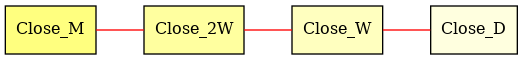

INFO:pyaf.std:END_HIERARCHICAL_PLOTTING_TIME_IN_SECONDS 0.09022283554077148


In [7]:
# create a model to plot the hierarchy.
import pyaf.HierarchicalForecastEngine as hautof
lEngine = hautof.cHierarchicalForecastEngine()

H = 14

lSignalHierarchy = lEngine.plot_Hierarchy(goog_dataframe , "Date", "Close", H, 
                                          lHierarchy, None);

In [8]:
goog_dataframe

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
0,1257,GOOG,2011-07-28,610.941019,603.001016,6240000,605.191021,305.165344,615.981027
1,1256,GOOG,2011-07-29,603.691033,603.691033,8305700,604.231014,301.543972,614.961042
2,1255,GOOG,2011-08-01,606.771021,599.181019,7961800,611.221057,303.082428,615.501085
3,1254,GOOG,2011-08-02,592.400990,591.570985,6425100,606.001054,295.904590,609.671015
4,1253,GOOG,2011-08-03,601.171059,583.630982,7680000,594.271013,300.285244,603.001016
...,...,...,...,...,...,...,...,...,...
1253,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
1254,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
1255,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1256,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002


In [9]:
goog_dataframe.describe(include='all')

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
count,1258.000000,1258,1258,1258.000000,1258.000000,1.258000e+03,1258.000000,1258.000000,1258.000000
unique,NaN,1,1258,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,GOOG,2012-02-14 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1258,1,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,NaN,2011-07-28 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2016-07-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN
mean,628.500000,NaN,NaN,696.285816,690.186479,3.605697e+06,696.447039,491.820009,702.078363
std,363.297628,NaN,NaN,168.831035,168.088283,2.526549e+06,168.945199,146.224491,169.631658
min,0.000000,NaN,NaN,490.920851,480.600832,7.900000e+03,490.030838,245.215210,495.978230
25%,314.250000,NaN,NaN,568.940062,563.376311,1.788850e+06,569.516381,347.184670,574.225972


In [10]:
# create a hierarchical model and train it
import pyaf.HierarchicalForecastEngine as hautof

lEngine = hautof.cHierarchicalForecastEngine()
lEngine.mOptions.mNbCores = 20
lEngine.mOptions.mHierarchicalCombinationMethod = ["BU" , 'TD' , 'MO' , 'OC']
lDateColumn = "Date"
lSignalVar = "Close";

#
N = goog_dataframe.shape[0];
train_df = goog_dataframe

print(train_df)
lSignalHierarchy = lEngine.train(train_df , lDateColumn, lSignalVar, H, lHierarchy, None);

INFO:pyaf.std:START_HIERARCHICAL_TRAINING
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA D {'TH_D_start': {0: Timestamp('2011-07-28 00:00:00'), 1: Timestamp('2011-07-29 00:00:00'), 2: Timestamp('2011-07-30 00:00:00'), 3: Timestamp('2011-07-31 00:00:00'), 4: Timestamp('2011-08-01 00:00:00')}, 'Close': {0: 610.9410190000001, 1: 603.6910330000001, 2: 0.0, 3: 0.0, 4: 606.771021}}
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA W {'TH_W_start': {0: Timestamp('2011-07-28 00:00:00'), 1: Timestamp('2011-08-04 00:00:00'), 2: Timestamp('2011-08-11 00:00:00'), 3: Timestamp('2011-08-18 00:00:00'), 4: Timestamp('2011-08-25 00:00:00')}, 'Close': {0: 1214.6320520000002, 1: 2956.9050859999998, 2: 2794.344764, 3: 2625.184499, 4: 2587.1843790000003}}
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_TEMPORAL_HORIZONS_FIRST_RESAMPLED_DATA 2W {'TH_2W_start': {0: Timestamp('2011-07-28 00:00:00'), 1: Timestamp('2011-08-11 00:00:00'

      Unnamed: 0 Symbol       Date       Close         Low   Volume  \
0           1257   GOOG 2011-07-28  610.941019  603.001016  6240000   
1           1256   GOOG 2011-07-29  603.691033  603.691033  8305700   
2           1255   GOOG 2011-08-01  606.771021  599.181019  7961800   
3           1254   GOOG 2011-08-02  592.400990  591.570985  6425100   
4           1253   GOOG 2011-08-03  601.171059  583.630982  7680000   
...          ...    ...        ...         ...         ...      ...   
1253           4   GOOG 2016-07-21  738.630005  735.830994   969100   
1254           3   GOOG 2016-07-22  742.739990  736.559998  1256300   
1255           2   GOOG 2016-07-25  739.770020  737.500000  1030700   
1256           1   GOOG 2016-07-26  738.419983  734.270020  1179400   
1257           0   GOOG 2016-07-27  741.770020  737.000000  1497100   

            Open   Adj_Close        High  
0     605.191021  305.165344  615.981027  
1     604.231014  301.543972  614.961042  
2     611.221057  

INFO:pyaf.std:START_TRAINING 'Close_D'
INFO:pyaf.std:START_TRAINING 'Close_W'
INFO:pyaf.std:START_TRAINING 'Close_2W'
INFO:pyaf.std:START_TRAINING 'Close_M'
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_M' 4.82883620262146
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_2W' 6.123188018798828
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_W' 7.762847661972046
INFO:pyaf.std:END_TRAINING_TIME_IN_SECONDS 'Close_D' 9.76391077041626
INFO:pyaf.hierarchical:TRAINING_HIERARCHICAL_MODEL_COMPUTE_TOP_DOWN_HISTORICAL_PROPORTIONS
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Close_D'), (1, 'Close_W'), (2, 'Close_2W'), (3, 'Close_M')]
INFO:pyaf.std:START_FORECASTING 'Close_D'
INFO:pyaf.std:START_FORECASTING 'Close_W'
INFO:pyaf.std:START_FORECASTING 'Close_2W'
INFO:pyaf.std:START_FORECASTING 'Close_M'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Close_W' 0.30876851081848145
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Close_M' 0.27300524711608887
INFO:pyaf.std:END_

INFO:pyaf.hierarchical:REPORT_COMBINED_FORECASTS_VALID_PERF {'Signal': 'Close_D_MO_Forecast', 'Length': 249, 'MAPE': 0.9044, 'RMSE': 662.5512235424183, 'MAE': 630.1077693108908, 'SMAPE': 1.804, 'ErrorMean': -626.5016298974506, 'ErrorStdDev': 215.56862376837987, 'R2': -190.04844802025605, 'Pearson': 0.02143634358885203}
INFO:pyaf.hierarchical:REPORT_COMBINED_FORECASTS_FIT_PERF {'Signal': 'Close_D_OC_Forecast', 'Length': 995, 'MAPE': 1.0883, 'RMSE': 1012.521465962027, 'MAE': 740.4937183965897, 'SMAPE': 1.1292, 'ErrorMean': -66.07724585005614, 'ErrorStdDev': 1010.3630617826266, 'R2': -27.946905074282803, 'Pearson': 0.09266731601743053}
INFO:pyaf.hierarchical:REPORT_COMBINED_FORECASTS_VALID_PERF {'Signal': 'Close_D_OC_Forecast', 'Length': 249, 'MAPE': 1.0881, 'RMSE': 1017.7330788922806, 'MAE': 758.0471843522033, 'SMAPE': 1.1232, 'ErrorMean': -35.53108734659183, 'ErrorStdDev': 1017.1126592976464, 'R2': -449.7880286769803, 'Pearson': 0.040075654908449804}
INFO:pyaf.hierarchical:REPORT_COMBIN

INFO:pyaf.std:END_HIERARCHICAL_TRAINING_TIME_IN_SECONDS 11.284384965896606


In [11]:
train_df

,Unnamed: 0,Symbol,Date,Close,Low,Volume,Open,Adj_Close,High
0,1257,GOOG,2011-07-28,610.941019,603.001016,6240000,605.191021,305.165344,615.981027
1,1256,GOOG,2011-07-29,603.691033,603.691033,8305700,604.231014,301.543972,614.961042
2,1255,GOOG,2011-08-01,606.771021,599.181019,7961800,611.221057,303.082428,615.501085
3,1254,GOOG,2011-08-02,592.400990,591.570985,6425100,606.001054,295.904590,609.671015
4,1253,GOOG,2011-08-03,601.171059,583.630982,7680000,594.271013,300.285244,603.001016
...,...,...,...,...,...,...,...,...,...
1253,4,GOOG,2016-07-21,738.630005,735.830994,969100,740.359985,738.630005,741.690002
1254,3,GOOG,2016-07-22,742.739990,736.559998,1256300,741.859985,742.739990,743.239990
1255,2,GOOG,2016-07-25,739.770020,737.500000,1030700,740.669983,739.770020,742.609985
1256,1,GOOG,2016-07-26,738.419983,734.270020,1179400,739.039978,738.419983,741.690002


In [12]:
lEngine.getModelInfo()

INFO:pyaf.std:TIME_DETAIL TimeVariable='TH_D_start' TimeMin=2011-07-28T00:00:00.000000 TimeMax=2015-07-13T00:00:00.000000 TimeDelta=<DateOffset: days=1> Horizon=14
INFO:pyaf.std:SIGNAL_DETAIL_ORIG SignalVariable='Close_D' Length=1258  Min=490.92085099999997 Max=1220.172036  Mean=696.2858158593004 StdDev=168.76391868223206
INFO:pyaf.std:SIGNAL_DETAIL_TRANSFORMED TransformedSignalVariable='_Close_D' Min=490.92085099999997 Max=1220.172036  Mean=696.2858158593004 StdDev=168.76391868223206
INFO:pyaf.std:BEST_TRANSOFORMATION_TYPE '_'
INFO:pyaf.std:BEST_DECOMPOSITION  '_Close_D_Lag1Trend_residue_zeroCycle_residue_NoAR' [Lag1Trend + NoCycle + NoAR]
INFO:pyaf.std:TREND_DETAIL '_Close_D_Lag1Trend' [Lag1Trend]
INFO:pyaf.std:CYCLE_DETAIL '_Close_D_Lag1Trend_residue_zeroCycle' [NoCycle]
INFO:pyaf.std:AUTOREG_DETAIL '_Close_D_Lag1Trend_residue_zeroCycle_residue_NoAR' [NoAR]
INFO:pyaf.std:MODEL_MAPE MAPE_Fit=0.0112 MAPE_Forecast=0.0123 MAPE_Test=0.0069
INFO:pyaf.std:MODEL_SMAPE SMAPE_Fit=0.0109 SMAPE

In [13]:

lForecast = lEngine.forecast(train_df, iHorizon=14)

INFO:pyaf.std:START_HIERARCHICAL_FORECASTING
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODELS_LEVEL_SIGNAL [(0, 'Close_D'), (1, 'Close_W'), (2, 'Close_2W'), (3, 'Close_M')]
INFO:pyaf.std:START_FORECASTING 'Close_D'
INFO:pyaf.std:START_FORECASTING 'Close_W'
INFO:pyaf.std:START_FORECASTING 'Close_2W'
INFO:pyaf.std:START_FORECASTING 'Close_M'
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Close_W' 0.31075286865234375
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Close_M' 0.2850520610809326
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Close_D' 0.35780906677246094
INFO:pyaf.std:END_FORECAST_TIME_IN_SECONDS  'Close_2W' 0.5343384742736816
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODEL_COMBINATION_METHODS ['BU', 'TD', 'MO', 'OC']
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODEL_BOTTOM_UP_METHOD BU
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODEL_TOP_DOWN_METHOD AHP_TD
INFO:pyaf.hierarchical:FORECASTING_HIERARCHICAL_MODEL_TOP_DOWN_METHOD PHA_TD
INFO:pyaf.hierarchical:FORECAS

In [14]:
lForecast

,TH_D_start,Close_D,Close_D_Forecast,Close_D_Forecast_Lower_Bound,Close_D_Forecast_Upper_Bound,Date,TH_W_start,Close_W,Close_W_Forecast,Close_W_Forecast_Lower_Bound,...,Close_W_PHA_TD_Forecast,Close_D_PHA_TD_Forecast,Close_2W_MO_Forecast,Close_W_MO_Forecast,Close_D_MO_Forecast,Close_M_MO_Forecast,Close_D_OC_Forecast,Close_W_OC_Forecast,Close_2W_OC_Forecast,Close_M_OC_Forecast
0,2011-07-28,610.941019,610.941019,NaN,NaN,2011-07-28,2011-07-28,1214.632052,3292.628598,NaN,...,3362.615927,695.684197,1951.478567,985.11477,203.808223,1951.478567,5118.774516,5118.774516,5118.774516,5118.774516
1,2011-07-29,603.691033,610.941019,NaN,NaN,2011-07-29,NaT,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,152.735255,152.735255,152.735255,152.735255
2,2011-08-01,606.771021,603.691033,NaN,NaN,2011-08-01,NaT,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,150.922758,150.922758,150.922758,150.922758
3,2011-08-02,592.400990,606.771021,NaN,NaN,2011-08-02,NaT,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,151.692755,151.692755,151.692755,151.692755
4,2011-08-03,601.171059,592.400990,NaN,NaN,2011-08-03,NaT,0.000000,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,148.100248,148.100248,148.100248,148.100248
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1267,2016-08-06,NaN,741.770020,667.994786,815.545254,2016-08-06,NaT,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,185.442505,185.442505,185.442505,185.442505
1268,2016-08-07,NaN,741.770020,665.662316,817.877724,2016-08-07,NaT,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,185.442505,185.442505,185.442505,185.442505
1269,2016-08-08,NaN,741.770020,663.261926,820.278114,2016-08-08,NaT,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,185.442505,185.442505,185.442505,185.442505
1270,2016-08-09,NaN,741.770020,661.346074,822.193966,2016-08-09,NaT,NaN,0.000000,NaN,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,185.442505,185.442505,185.442505,185.442505


In [15]:
lForecast.columns

Index(['TH_D_start', 'Close_D', 'Close_D_Forecast',
       'Close_D_Forecast_Lower_Bound', 'Close_D_Forecast_Upper_Bound', 'Date',
       'TH_W_start', 'Close_W', 'Close_W_Forecast',
       'Close_W_Forecast_Lower_Bound', 'Close_W_Forecast_Upper_Bound',
       'TH_2W_start', 'Close_2W', 'Close_2W_Forecast',
       'Close_2W_Forecast_Lower_Bound', 'Close_2W_Forecast_Upper_Bound',
       'TH_M_start', 'Close_M', 'Close_M_Forecast',
       'Close_M_Forecast_Lower_Bound', 'Close_M_Forecast_Upper_Bound',
       'Close_D_BU_Forecast', 'Close_W_BU_Forecast', 'Close_2W_BU_Forecast',
       'Close_M_BU_Forecast', 'Close_M_AHP_TD_Forecast',
       'Close_2W_AHP_TD_Forecast', 'Close_W_AHP_TD_Forecast',
       'Close_D_AHP_TD_Forecast', 'Close_M_PHA_TD_Forecast',
       'Close_2W_PHA_TD_Forecast', 'Close_W_PHA_TD_Forecast',
       'Close_D_PHA_TD_Forecast', 'Close_2W_MO_Forecast',
       'Close_W_MO_Forecast', 'Close_D_MO_Forecast', 'Close_M_MO_Forecast',
       'Close_D_OC_Forecast', 'Close_W_OC_

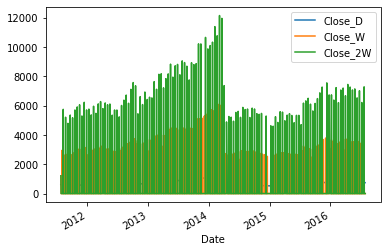

In [16]:
lForecast.plot('Date' , ['Close_D' , 'Close_W' , 'Close_2W'] )

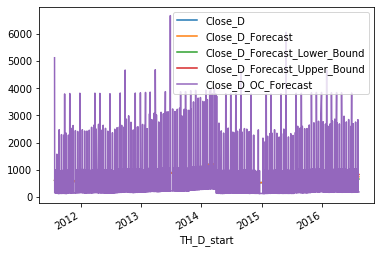

In [17]:
lForecast.plot('TH_D_start' , ['Close_D' , 'Close_D_Forecast', 'Close_D_Forecast_Lower_Bound', 'Close_D_Forecast_Upper_Bound', 'Close_D_OC_Forecast'] )

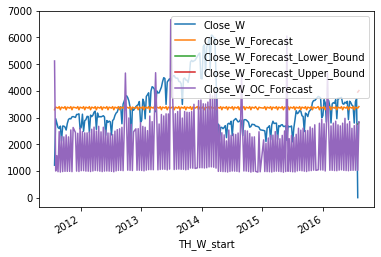

In [18]:
lForecast.plot('TH_W_start' , ['Close_W' , 'Close_W_Forecast', 'Close_W_Forecast_Lower_Bound', 'Close_W_Forecast_Upper_Bound', 'Close_W_OC_Forecast'  ] )

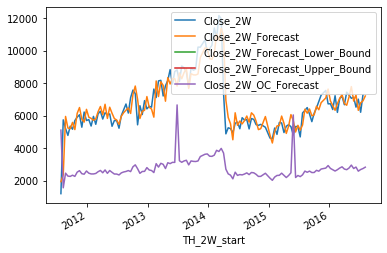

In [19]:
lForecast.plot('TH_2W_start' , ['Close_2W' , 'Close_2W_Forecast' ,'Close_2W_Forecast_Lower_Bound', 'Close_2W_Forecast_Upper_Bound', 'Close_2W_OC_Forecast'    ] )

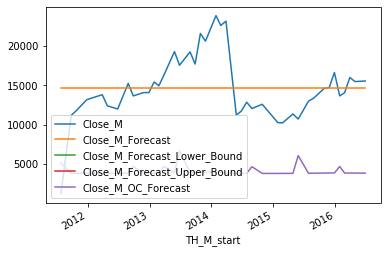

In [20]:
lForecast.plot('TH_M_start' , ['Close_M' , 'Close_M_Forecast' ,  'Close_M_Forecast_Lower_Bound', 'Close_M_Forecast_Upper_Bound', 'Close_M_OC_Forecast'  ] )

In [21]:
lForecast[lForecast.Date > goog_dataframe.Date.max()].sum()

Close_D                              0.000000
Close_D_Forecast                 10384.780280
Close_D_Forecast_Lower_Bound      9515.444399
Close_D_Forecast_Upper_Bound     11254.116161
Close_W                              0.000000
Close_W_Forecast                  6761.284900
Close_W_Forecast_Lower_Bound      5562.071510
Close_W_Forecast_Upper_Bound      7960.498291
Close_2W                             0.000000
Close_2W_Forecast                 7217.101281
Close_2W_Forecast_Lower_Bound     6244.783305
Close_2W_Forecast_Upper_Bound     8189.419256
Close_M                              0.000000
Close_M_Forecast                     0.000000
Close_M_Forecast_Lower_Bound         0.000000
Close_M_Forecast_Upper_Bound         0.000000
Close_D_BU_Forecast              10384.780280
Close_W_BU_Forecast              10384.780280
Close_2W_BU_Forecast              6761.284900
Close_M_BU_Forecast               7217.101281
Close_M_AHP_TD_Forecast              0.000000
Close_2W_AHP_TD_Forecast          